In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
colnames=['ch_1','ch_2','ch_3','ch_4']
data_1 = pd.read_csv('/Users/jhr/Documents/capstone/Dataset for multi-channel surface electromyography (sEMG) signals of hand gestures/sEMG-dataset/raw/csv/1_raw.csv', names=colnames)

In [3]:
data_1.head() #index starts at 0

,ch_1,ch_2,ch_3,ch_4
0,8.458862,-4.467468,7.217712,0.019226
1,8.465576,-4.466553,7.217102,0.019531
2,8.467407,-4.466553,7.214050,0.020447
3,8.469238,-4.464722,7.217407,0.021973
4,8.464355,-4.467773,7.214966,0.018616


In [4]:
data_1.tail() #index finishes at 1279999

,ch_1,ch_2,ch_3,ch_4
1279995,7.677917,-3.158569,5.378113,0.000000
1279996,7.694397,-3.151550,5.379028,0.001221
1279997,7.703247,-3.152161,5.381470,0.002441
1279998,7.700195,-3.157043,5.379028,0.003357
1279999,7.695923,-3.159790,5.373840,0.002441


See lineplot for overview

/opt/miniconda3/envs/bigdata/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/miniconda3/envs/bigdata/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


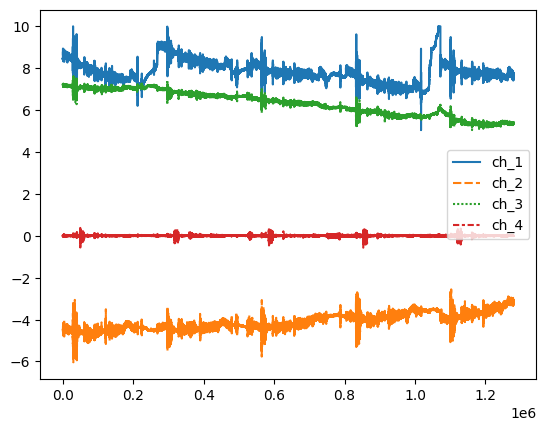

In [5]:
seaborn_line = sns.lineplot(data=data_1)

data_1 has 5 section with a big pattern

The authors said that the data is 640s long 
(104s-30s-104s-30s-104s-30s-104s-30s-104s, 30s is the rest between patterns)

2K bitrate so the first pattern of this data is 1~268000 (the last 60000 is the rest time)

In [6]:
data_1_pattern = [data_1[i:i + 268000] for i in range(0, len(data_1), 268000)] #divide the data by 268000 steps at a time

In [7]:
data_1_pattern[4].head()

,ch_1,ch_2,ch_3,ch_4
1072000,8.594055,-3.824463,6.054688,-0.005188
1072001,8.685913,-3.800964,6.057739,-0.004578
1072002,8.721008,-3.786011,6.064758,-0.003357
1072003,8.725586,-3.803101,6.070251,-0.002747
1072004,8.707275,-3.846130,6.072998,-0.003662


In [8]:
data_1_pattern[4].tail()

,ch_1,ch_2,ch_3,ch_4
1279995,7.677917,-3.158569,5.378113,0.000000
1279996,7.694397,-3.151550,5.379028,0.001221
1279997,7.703247,-3.152161,5.381470,0.002441
1279998,7.700195,-3.157043,5.379028,0.003357
1279999,7.695923,-3.159790,5.373840,0.002441


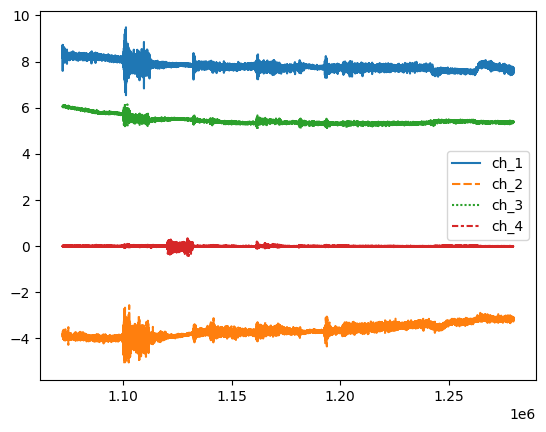

In [9]:
seaborn_line_pattern = sns.lineplot(data=data_1_pattern[4]) #view the last 104s of data

one 104s pattern has 10 gestures (4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s-6s-4s, 4s is the rest between gestures)

Split it into 10 dataframe without the first 2s and the last 2s

So you can have ten 2s-6s-2s blocks

In [10]:
data_1_gesture = np.array_split(data_1_pattern[4].iloc[4000:204000], 10) #split the data into 10 gestures

/opt/miniconda3/envs/bigdata/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
data_1_gesture[9].head()

,ch_1,ch_2,ch_3,ch_4
1256000,7.530518,-3.290710,5.421448,-0.004272
1256001,7.521667,-3.287964,5.425720,-0.002441
1256002,7.521057,-3.251648,5.420837,-0.001221
1256003,7.554932,-3.201294,5.419617,0.000000
1256004,7.579041,-3.174438,5.413818,0.001526


In [12]:
data_1_gesture[9].tail()

,ch_1,ch_2,ch_3,ch_4
1275995,7.630310,-3.161011,5.341797,0.000610
1275996,7.651062,-3.160095,5.331116,0.001831
1275997,7.663879,-3.165588,5.335999,0.001831
1275998,7.684021,-3.179932,5.331421,0.000916
1275999,7.676086,-3.179626,5.346375,-0.000610


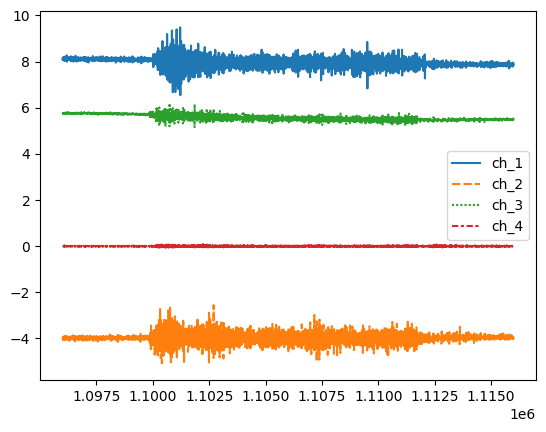

In [13]:
seaborn_line_gesture = sns.lineplot(data=data_1_gesture[1]) #view the second gesture of a pattern ('Extension')

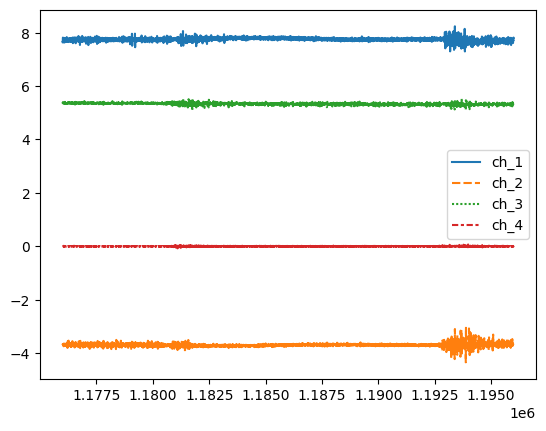

In [14]:
seaborn_line_gesture = sns.lineplot(data=data_1_gesture[5]) #view the sixth gesture of a pattern ('Grip')

Trying to make saparated dataframes by channel, check 'ch_1' feature of 'data_1_gesture[0]'

In [15]:
df_ch_1_gesture_0 = pd.DataFrame(data_1_gesture[0]['ch_1']) #create a dataframe to see the ch_1 of gesture_0 only
df_ch_1_gesture_0

,ch_1
1076000,8.324280
1076001,8.341370
1076002,8.348999
1076003,8.351135
1076004,8.343201
...,...
1095995,8.110657
1095996,8.118286
1095997,8.114014
1095998,8.105469


Make all gestures to features of 'df_ch_1_gestures' dataframe by pd.concat

In [16]:
for i in range(10):
    if i == 0: #make a dataframe what sets the standard index
        df_ch_1_gestures = pd.DataFrame(data_1_gesture[i]['ch_1'])
    else: #appending the other features by pd.concat
        df_ch_1_gestures = pd.concat([df_ch_1_gestures,pd.DataFrame(data_1_gesture[i]['ch_1']).set_index(df_ch_1_gestures.index)],axis=1,join='inner')

df_ch_1_gestures

,ch_1,ch_1,ch_1,ch_1,ch_1,ch_1,ch_1,ch_1,ch_1,ch_1
1076000,8.324280,8.096619,7.861938,7.862854,7.761230,7.654114,7.804565,7.728271,7.734680,7.530518
1076001,8.341370,8.084412,7.849731,7.871094,7.756958,7.637024,7.773132,7.749939,7.707825,7.521667
1076002,8.348999,8.078613,7.843628,7.864075,7.758484,7.642212,7.745667,7.768555,7.704468,7.521057
1076003,8.351135,8.078308,7.839050,7.856140,7.755432,7.653198,7.707520,7.761230,7.719727,7.554932
1076004,8.343201,8.087769,7.841187,7.843018,7.748413,7.653198,7.691650,7.752991,7.747192,7.579041
...,...,...,...,...,...,...,...,...,...,...
1095995,8.110657,7.905273,7.820740,7.767639,7.804565,7.779846,7.780151,7.706299,7.636719,7.630310
1095996,8.118286,7.898865,7.826233,7.781677,7.768555,7.809448,7.769165,7.703552,7.628784,7.651062
1095997,8.114014,7.894897,7.834778,7.782288,7.743225,7.817688,7.755432,7.716064,7.580261,7.663879
1095998,8.105469,7.889404,7.839661,7.780457,7.709961,7.818298,7.743225,7.737427,7.536316,7.684021


You can see the dataframe has ten columns that are gestures

But there are only 'ch_1', make a loop for every channel 

In [17]:
for f in colnames:
    for i in range(10):    
        if i == 0: #make a dataframe what sets the standard index
            globals()['df_{}_gestures'.format(f)] = pd.DataFrame(data_1_gesture[i][f])
        else: #appending the other features by pd.concat
            globals()['df_{}_gestures'.format(f)] = pd.concat([globals()['df_{}_gestures'.format(f)],pd.DataFrame(data_1_gesture[i][f]).set_index(globals()['df_{}_gestures'.format(f)].index)],axis=1,join='inner')

df_ch_4_gestures

,ch_4,ch_4,ch_4,ch_4,ch_4,ch_4,ch_4,ch_4,ch_4,ch_4
1076000,-0.007935,0.000305,-0.006409,-0.000916,-0.000305,-0.003967,0.008850,-0.008545,-0.003052,-0.004272
1076001,-0.008545,0.000000,-0.005798,0.000305,-0.000610,-0.003967,0.002441,-0.008240,-0.004272,-0.002441
1076002,-0.009155,-0.000916,-0.003662,0.000916,-0.000305,-0.003967,-0.003967,-0.006409,-0.004883,-0.001221
1076003,-0.008850,-0.000916,-0.002136,0.001221,0.000000,-0.003357,-0.008545,-0.004272,-0.003662,0.000000
1076004,-0.008850,-0.000305,-0.001831,0.000916,-0.000305,-0.002441,-0.010071,-0.002441,-0.001831,0.001526
...,...,...,...,...,...,...,...,...,...,...
1095995,-0.001526,0.010376,-0.001526,-0.006104,0.003662,-0.003052,0.003967,0.002747,-0.007629,0.000610
1095996,-0.001221,0.008850,-0.001526,-0.003357,0.003357,0.000610,0.000916,0.003052,-0.005493,0.001831
1095997,-0.000610,0.004578,-0.001831,-0.001831,0.000916,0.007629,-0.002441,0.003357,-0.006714,0.001831
1095998,-0.000305,-0.000916,-0.002136,-0.000916,-0.001831,0.013428,-0.005188,0.001831,-0.007935,0.000916


And the feature names are all the same, change it

In [18]:
gesture_names = ['Rest','Extension','Flexion','Ulnar Deviation','Radial Deviation','Grip','Abduction of Fingers','Adduction of Fingers','Supination','Pronation']

for f in colnames: #rename the columns by the exact gesture names
    globals()['df_{}_gestures'.format(f)].columns = gesture_names
df_ch_2_gestures

,Rest,Extension,Flexion,Ulnar Deviation,Radial Deviation,Grip,Abduction of Fingers,Adduction of Fingers,Supination,Pronation
1076000,-3.870850,-3.955078,-3.984375,-3.749084,-3.726196,-3.655701,-3.690491,-3.595886,-3.316040,-3.290710
1076001,-3.873901,-3.970032,-3.990173,-3.712158,-3.732300,-3.672791,-3.689880,-3.597412,-3.367615,-3.287964
1076002,-3.889771,-3.977966,-3.997498,-3.711853,-3.730164,-3.674011,-3.685303,-3.583069,-3.407898,-3.251648
1076003,-3.911438,-3.969727,-4.001770,-3.699646,-3.733826,-3.668518,-3.682251,-3.587952,-3.427124,-3.201294
1076004,-3.927307,-3.969727,-3.996582,-3.714600,-3.731995,-3.670044,-3.677063,-3.586121,-3.424683,-3.174438
...,...,...,...,...,...,...,...,...,...,...
1095995,-4.027710,-3.979797,-3.746948,-3.714294,-3.558044,-3.674622,-3.498230,-3.361206,-3.372803,-3.161011
1095996,-4.028015,-4.006348,-3.780518,-3.698120,-3.591614,-3.670044,-3.524170,-3.327332,-3.350525,-3.160095
1095997,-4.028625,-4.010620,-3.795471,-3.700867,-3.610840,-3.673401,-3.544922,-3.318787,-3.310852,-3.165588
1095998,-4.000244,-3.998413,-3.806458,-3.709717,-3.620300,-3.677673,-3.571777,-3.309326,-3.274536,-3.179932
